<a href="https://colab.research.google.com/github/hungry4therock/Colab/blob/main/7_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_RNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
내용: 텐서플로 RNN 실습하기
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential
tf.__version__

'2.5.0'

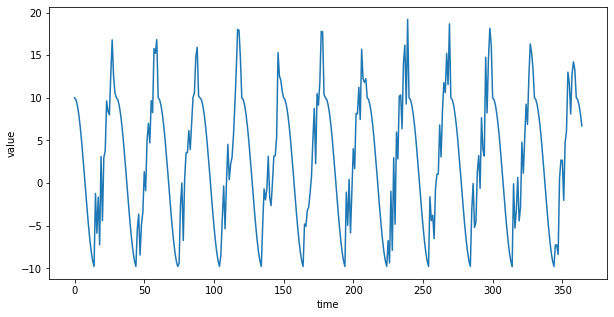

In [3]:
# 시계열 데이터 만들기
time = np.arange(365)
month_time = (time % 30) / 30

time_series = 10 * np.where(month_time < 0.5, 
                            np.cos(2 * np.pi * month_time), 
                            np.cos(2 * np.pi * month_time) + np.random.random(365))

# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 365), time_series[:365])

In [4]:
time_series

array([ 1.00000000e+01,  9.78147601e+00,  9.13545458e+00,  8.09016994e+00,
        6.69130606e+00,  5.00000000e+00,  3.09016994e+00,  1.04528463e+00,
       -1.04528463e+00, -3.09016994e+00, -5.00000000e+00, -6.69130606e+00,
       -8.09016994e+00, -9.13545458e+00, -9.78147601e+00, -1.22103932e+00,
       -5.88423844e+00, -1.64400278e+00, -7.24335499e+00,  3.11421881e+00,
       -4.42273317e+00,  2.98705232e+00,  3.77623513e+00,  9.62739677e+00,
        8.39767426e+00,  8.00108311e+00,  1.27630193e+01,  1.67942346e+01,
        1.24960792e+01,  1.05620875e+01,  1.00000000e+01,  9.78147601e+00,
        9.13545458e+00,  8.09016994e+00,  6.69130606e+00,  5.00000000e+00,
        3.09016994e+00,  1.04528463e+00, -1.04528463e+00, -3.09016994e+00,
       -5.00000000e+00, -6.69130606e+00, -8.09016994e+00, -9.13545458e+00,
       -9.78147601e+00, -5.47337571e+00, -3.64143922e+00, -8.44275378e+00,
       -4.87628369e+00, -3.41287643e+00,  1.31993438e+00, -9.04030976e-01,
        4.94915151e+00,  

In [5]:
# RNN 학습을 위한 데이터 전처리
def make_sequence(time_series, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):

    t = time_series[i:(i+n)]

    if (i+n) < len(time_series):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break

  return np.array(train_data), np.array(train_label)


train_data, train_label = make_sequence(time_series, 10)

# 데이터셋 구조변환
train_data = train_data.reshape(-1, 10, 1) # -1 자동을 의미, 자동 x 10 x 1 을 의미한다
train_label = train_label.reshape(-1, 1)

print(train_data.shape)

# 학습데이터, 테스트 데이터
_train_data  = train_data[:300]
_train_label = train_label[:300]

_test_data  = train_data[300:]
_test_label = train_label[300:]


(355, 10, 1)


In [6]:
# 학습 모델 설계
model = Sequential()

model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 설정
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

In [8]:
# 모델 학습하기
model.fit(_train_data, _train_label, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 39.5699 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 34.9046 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 30.9894 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 27.7676 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 25.0844 - acc: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 22.6925 - acc: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 20.7063 - acc: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 19.0322 - acc: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 17.7693 - acc: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 16.7102 - acc: 0.0000e+00
Epoch 11/

In [9]:
# 성능 평가
model.evaluate(_test_data, _test_label)

2/2 [==============================] - 0s 7ms/step - loss: 8.5937 - acc: 0.0000e+00


[8.593683242797852, 0.0]

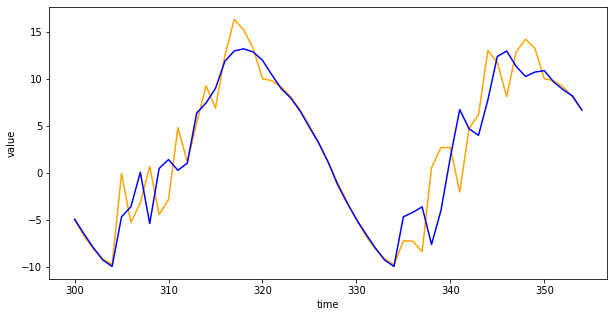

In [10]:
# 모델 평가하기
result = model.predict(_test_data)
result_range = np.arange(len(_train_label), len(_train_label) + len(result))

result_range

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label, color='orange', label='label')
plt.plot(result_range, result, color='blue', label='result')
plt.show()